In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import pickle
import random
import cv2

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

np.random.seed(0)

In [2]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)

with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)

print(type(train_data))

x_train, y_train = train_data['features'], train_data['labels']
x_val, y_val = val_data['features'], val_data['labels']
x_test, y_test = test_data['features'], test_data['labels']



<class 'dict'>


In [3]:
print(x_train.shape)#34799 images 32*32 pixels with depth of 3
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [4]:
assert (x_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to the number of labels'
assert (x_val.shape[0] == y_val.shape[0]), 'The number of images is not equal to the number of labels'
assert (x_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels'

assert(x_train.shape[1: ] == (32, 32, 3)), 'The dimensions of the images are not 32 x 32 x 3'
assert(x_val.shape[1: ] == (32, 32, 3)), 'The dimensions of the images are not 32 x 32 x 3'
assert(x_test.shape[1: ] == (32, 32, 3)), 'The dimensions of the images are not 32 x 32 x 3'

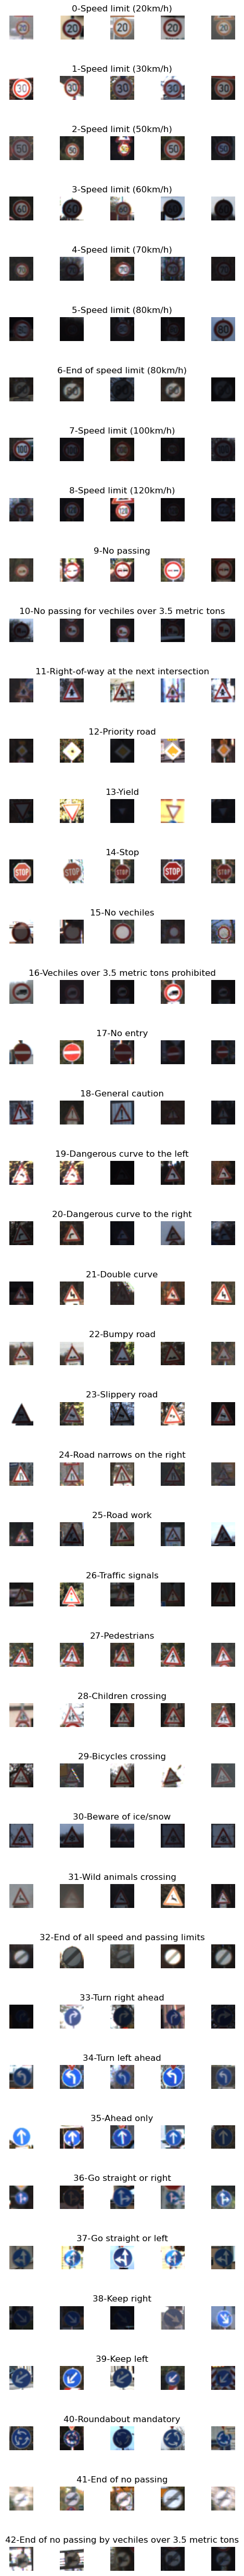

In [5]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected) - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ '-' + row['SignName'])
            num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

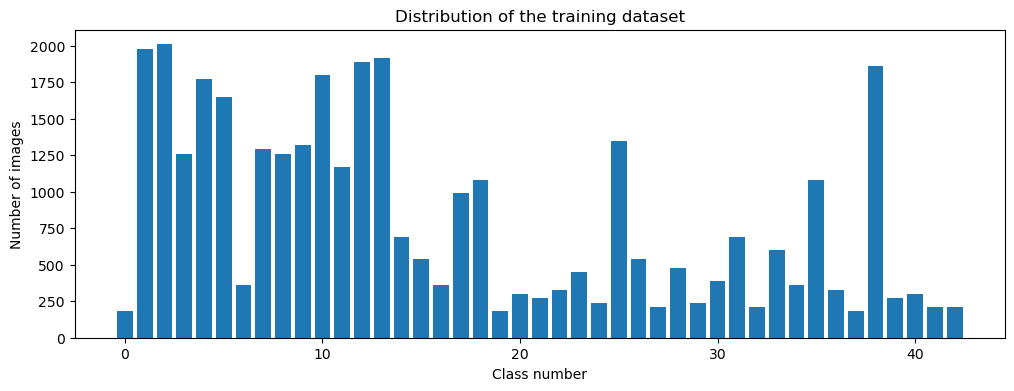

In [6]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")


(32, 32, 3)
36


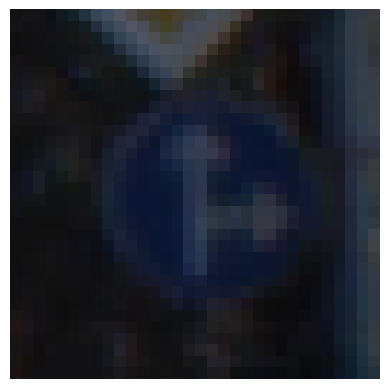

In [7]:
plt.imshow(x_train[1000], interpolation='none')
plt.axis('off')
print(x_train[1000].shape)
print(y_train[1000])

(32, 32)


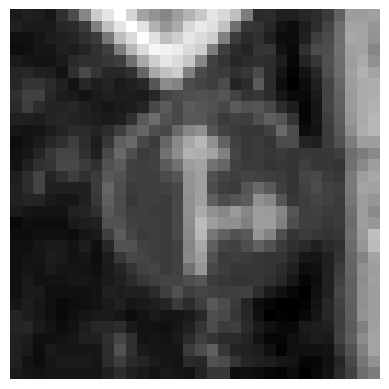

In [8]:
def gray_scale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = gray_scale(x_train[1000])
plt.imshow(img, cmap='gray', interpolation='none')
plt.axis('off')
print(img.shape)


(32, 32)


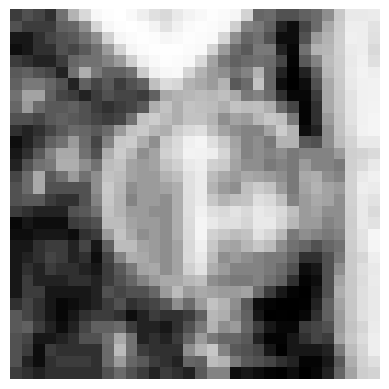

In [9]:
def equalize(img):#only accepts gray scale images
    img = cv2.equalizeHist(img)#only accepts gray scale images
    return img

img = equalize(gray_scale(x_train[1000]))
plt.imshow(img, cmap='gray', interpolation='none')
plt.axis('off')
print(img.shape)

In [10]:
def preprocessing(img):
    img = gray_scale(img)
    img = equalize(img)
    img = img/255
    return img

x_train = np.array(list(map(preprocessing, x_train)))
x_val = np.array(list(map(preprocessing, x_val)))
x_test = np.array(list(map(preprocessing, x_test)))


(34799, 32, 32)


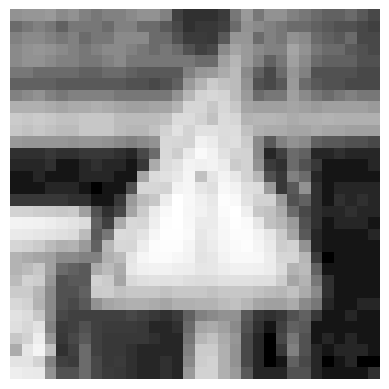

In [11]:
plt.imshow(x_train[random.randint(0, (len(x_train) - 1))], cmap='gray', interpolation='none')
plt.axis('off')
print(x_train.shape)

In [12]:
x_train = x_train.reshape(34799, 32, 32, 1)
x_val = x_val.reshape(4410, 32, 32, 1)
x_test = x_test.reshape(12630, 32, 32, 1)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [14]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [18]:
def modified_model():
    model =Sequential()
    model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))

    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics = ['accuracy'])
    return model

In [19]:
model = modified_model()
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 38s 412ms/step - accuracy: 0.1611 - loss: 3.1914 - val_accuracy: 0.7980 - val_loss: 0.7521
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 37s 429ms/step - accuracy: 0.7470 - loss: 0.8306 - val_accuracy: 0.9195 - val_loss: 0.3069
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 385ms/step - accuracy: 0.8673 - loss: 0.4318 - val_accuracy: 0.9374 - val_loss: 0.2124
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 392ms/step - accuracy: 0.9101 - loss: 0.2927 - val_accuracy: 0.9485 - val_loss: 0.1855
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 35s 398ms/step - accuracy: 0.9297 - loss: 0.2277 - val_accuracy: 0.9562 - val_loss: 0.1415
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 395ms/step - accuracy: 0.9408 - loss: 0.1887 - val_accuracy: 0.9637 - val_loss: 0.1345
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 35s 402ms/step - accuracy: 0.9469 - loss: 0.1662 - val_accuracy: 0.9660 - val_loss: 0.1179
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 33s 378ms/step - accuracy: 0.9578 - loss: 0.1339 - val_accu

Text(0.5, 0, 'epochs')

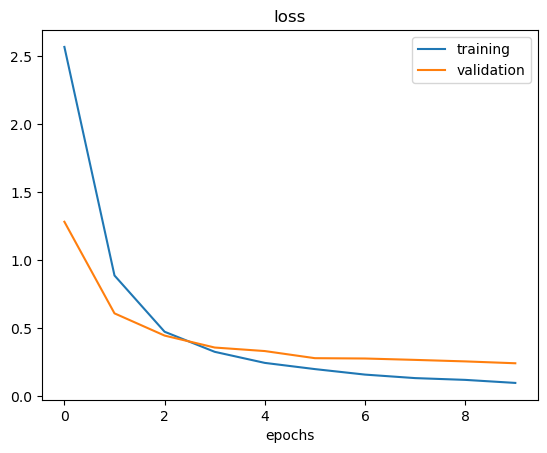

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

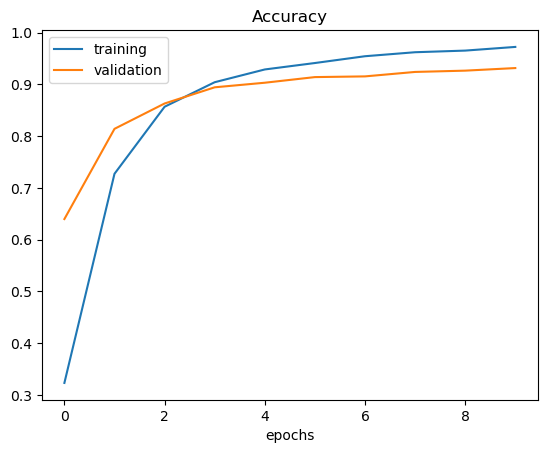

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epochs')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.31468909978866577
Test Accuracy: 0.9173396825790405
